# About Dataset

This dataset provides medical cost information for individuals based on various personal attributes. The aim of this notebook is to perform an exploratory data analysis (EDA) and understand the key factors that influence healthcare charges.

**Attributes**

1. ID: A unique identifier assigned to each individual record.
2. Age: The age of the individual.
3. Sex: Gender of the individual.
4. BMI: Body Mass Index of the individual, indicating the level of obesity.
5. Children: Number of children of the individual.
6. Smoker: Smoking status.
7. Region: Residential area in the US.
8. Medical Cost: Annual medical costs incurred by the individual.


**Key Questions of the Analysis**
1. Are there any outliers in the data, and how do they influence medical charges?
2. What does the distribution of each feature (age, BMI, etc.) tell us about the dataset?
3. How are medical charges related to numerical and categorical features?
4. Are there strong correlations between personal attributes and medical costs?
5. Can we classify individuals into high-cost or low-cost categories using logistic regression?
6. Can we accurately predict medical charges based on demographic and lifestyle factors using linear regression?

**Steps in Analysis**
1. Import libraries
2. Load dataset
3. Initial Exploration
4. Exploratory Data Analysis
5. Regression Models
6. Conclusion

**WHO BMI Classification:**
- Underweight: BMI less than 18.5 kg/m²
- Normal Weight: BMI 18.5 to 24.9 kg/m²
- Overweight: BMI 25 to 29.9 kg/m²
- Obesity: BMI 30 kg/m² or higher
- Severe Obesity: BMI 40 kg/m² or higher according to the World Obesity Federation



# Step 1: Import libraries


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Step 2: Load dataset

In [2]:
file_path = '/kaggle/input/medical-cost-dataset/medical_cost.csv'
df = pd.read_csv(file_path)

# Step 3: Initial Exploration

In [3]:
# Display dataset
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


From information, we able to know:
- rows: 1338 
- columns: 8
- Null values: all columns have NO null value
- drop column: Id column not necessary for the analysis


In [5]:
# Check for null values (to conform)
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check duplicated values
df.duplicated().sum()

0

In [7]:
# Drop Id column as it is not necessary for the analysis
df.drop('Id', axis=1, inplace=True)

In [8]:
# Check unique values
df.select_dtypes('object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [9]:
# Descriptive Summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Insight from descriptive summary:

- Age
   - Range from 18 to 64 years, with a mean age of ~39 years.
   - The distribution appears fairly spread out with std = 14.05, indicating a diverse age group of individuals.

- BMI (BMI threshold as per WHO >= 30)
   - BMI values range from 15.96 (underweight) to 53.13(severe obese), with a mean of ~30.66, which is at the edge of the obesity threshold.
   - The std of 6.10 might not extremely spread, but enough to show that the individual have wide range of body types, suggesting significant variation in body weight profiles.

- Children
   - Number of children ranges from 0 to 5, with median of 1.
   - About 25% individuals have no children, which might impact family medical expenses.

- Medical Charges
   - Charges range from 1,122 to 63,770, with a mean of ~13,270.
   - The median is lower (~9,382) than the mean, suggesting a right-skewed distribution, where a small number of individuals incur very high medical costs.


# Step 4: Exploratory Data Analysis (EDA)

# 1. Are there any outliers in the data, and how do they influence medical charges?

**Boxplot - to detect outlier in numerical features**

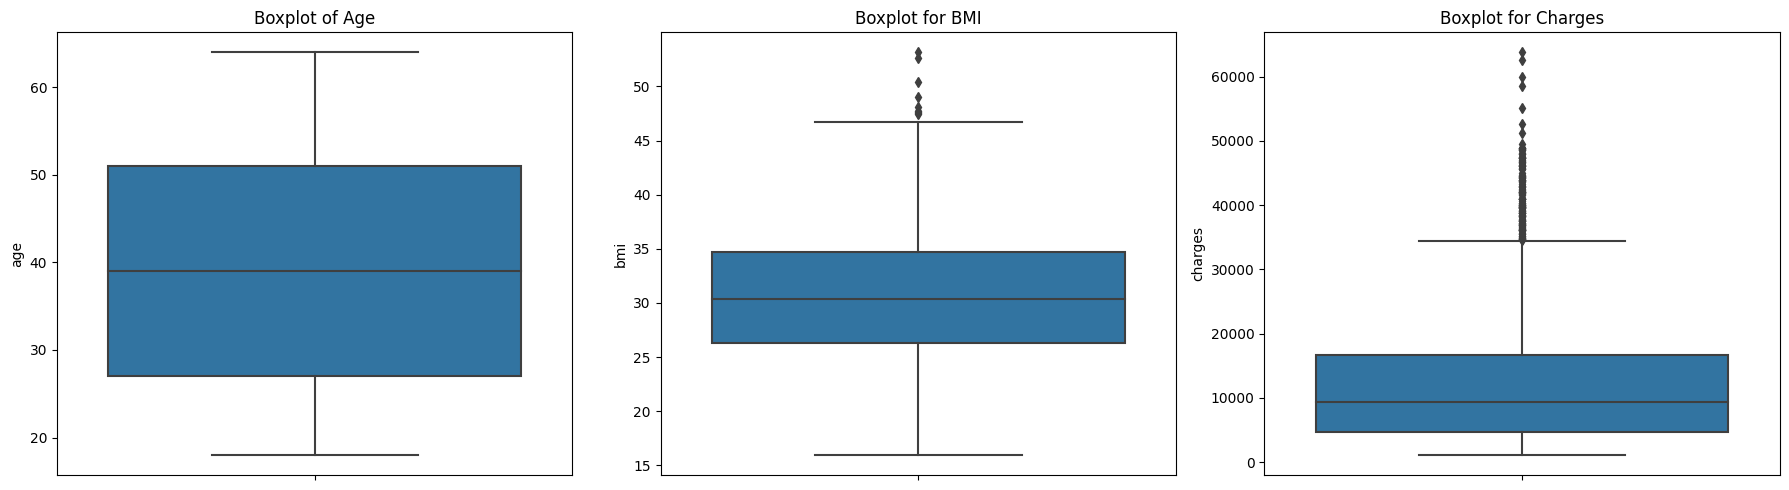

In [10]:
# Set the figure layout
fig, ax = plt.subplots(1,3, figsize=(18,5))

# Boxplot for age
sns.boxplot(data=df, y='age', ax=ax[0])
ax[0].set_title('Boxplot of Age')

# Boxplot for BMI
sns.boxplot(data=df, y='bmi', ax=ax[1])
ax[1].set_title('Boxplot for BMI')

# Boxplot for charges
sns.boxplot(data=df, y='charges', ax=ax[2])
ax[2].set_title('Boxplot for Charges')

# Display the plots
plt.tight_layout()
plt.show()

Insights from boxplot:

- Boxplot of Age
  - No extreme outliers
  - Age ranges same as descriptive statistics
- Boxplot of BMI
  - A few outliers above 45, indicating individuals with high BMI with potential obesity
  - Can check data with BMI > 45
- Boxplot of Charges
  - Significant number of outliers on the higher end
  - Indicates some individuals incur very high medical costs

**BMI outliers**

In [11]:
# How many data (count) with BMI>45
df_bmi=df[df['bmi']>45]
df_bmi['bmi'].count()

20

In [12]:
# Display dataframe of BMI>45
df_bmi.sort_values(by='bmi', ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627
1047,22,male,52.58,1,yes,southeast,44501.3982
847,23,male,50.38,1,no,southeast,2438.0552
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253


Summary of BMI outliers:

A subset of 20 individuals has BMI>45. Although these values are flagged as outliers in the boxplot, they fall within a realistic range for severe obesity. Since they are likely valid and important for the analysis of medical charges, they are retained in the dataset.

**Charges outliers**

In [13]:
# Compute interquartile range (IQR) to detect the outliers
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Print Q1, Q3, IQR, bounds
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


charges_outlier = (df['charges'] > upper_bound) | (df['charges'] < lower_bound)
charges_outlier.value_counts()

Q1: 4740.28715
Q3: 16639.912515
IQR: 11899.625365
Lower Bound: -13109.1508975
Upper Bound: 34489.350562499996


charges
False    1199
True      139
Name: count, dtype: int64

In [14]:
# Display dataframe charges with outliers
df[charges_outlier].sort_values(by='charges', ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [15]:
# Display just the charges column with condition with outliers
df.loc[charges_outlier, 'charges'].sort_values(ascending=False)

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
           ...     
1291    34828.65400
689     34806.46770
223     34779.61500
1078    34672.14720
623     34617.84065
Name: charges, Length: 139, dtype: float64

Summary of charges outliers:

After reviewing values, they appear to be valid high-cost medical cases with maximum value ~63770. Thus, we decided to retain the outliers, as they represent realistic variation in medical expenses.

# 2. What does the distribution of each feature tell us about the dataset?

**Histogram - to explore distributions of numerical features**

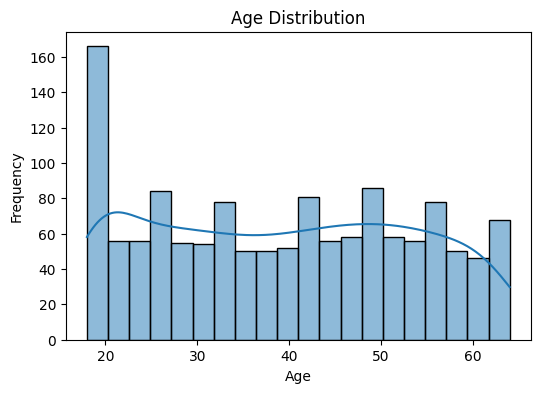

In [16]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight from age distribution histogram:

The age histogram shows a fairly even distribution, with most age groups between 20 and 60 well represented. There is no strong skew, and the data is broadly spread across adult age ranges, showing a good mix of age groups.

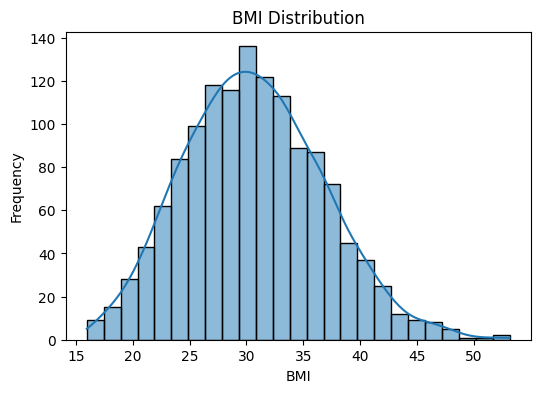

In [17]:
# BMI Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Insight from bmi distribution histogram:

- The histogram above shows the distribution of BMI (Body Mass Index) values in the dataset. The shape of the histogram is approximately bell-shaped, suggesting a normal distribution.
- Most BMI values fall between 25 and 35, which includes overweight and obese categories. Some people have very high BMI (above 45), which may indicates severe obesity.

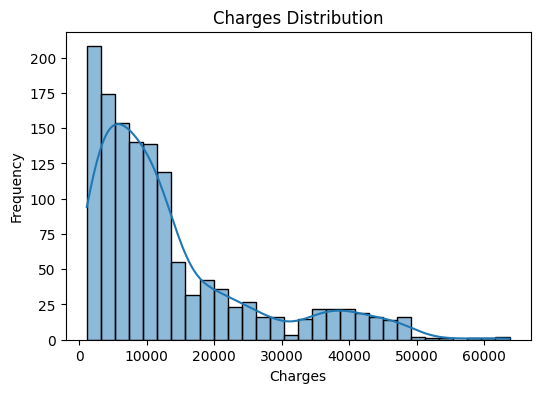

In [18]:
# Charges distribution
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Insight from charges distribution histogram:

The distribution of charges are right-skewed, meaning most people pay lower amounts, but a few pay very high costs (up to $60,000+). These high values may be due to specific factors.

**Countplots – to check distributions of categorical variables**

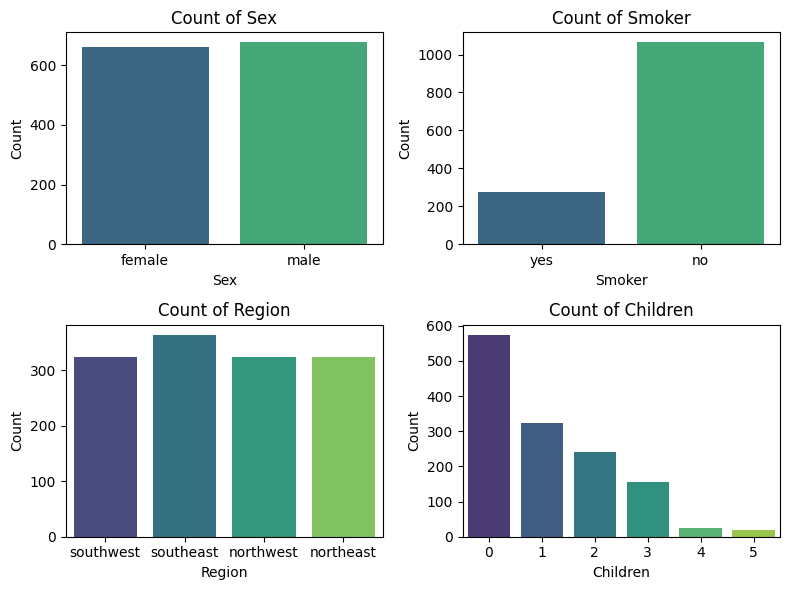

In [19]:
plt.figure(figsize=(8, 6))

# 1. Countplot for Sex
plt.subplot(2, 2, 1)
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# 2. Countplot for Smoker
plt.subplot(2, 2, 2)
sns.countplot(x='smoker', data=df, palette='viridis')
plt.title('Count of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

# 3. Countplot for Region
plt.subplot(2, 2, 3)
sns.countplot(x='region', data=df, palette='viridis')
plt.title('Count of Region')
plt.xlabel('Region')
plt.ylabel('Count')

# 4. Countplot for Children
plt.subplot(2, 2, 4)
sns.countplot(x='children', data=df, palette='viridis')
plt.title('Count of Children')
plt.xlabel('Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Insight from countplot:

- Sex: The dataset has a fairly balanced number of males and females.
- Smoker: There are more non-smokers than smokers, which may affect charge levels.
- Region: Customers are distributed across all four regions, with the southeast being the most represented.
- Children: Most people have between 0 and 2 children, with fewer having 4 or 5.

# 3. How are medical charges related to numerical and categorical features?

**Pairplot – to explore relationships and early trends of numerical features**

<Figure size 600x400 with 0 Axes>

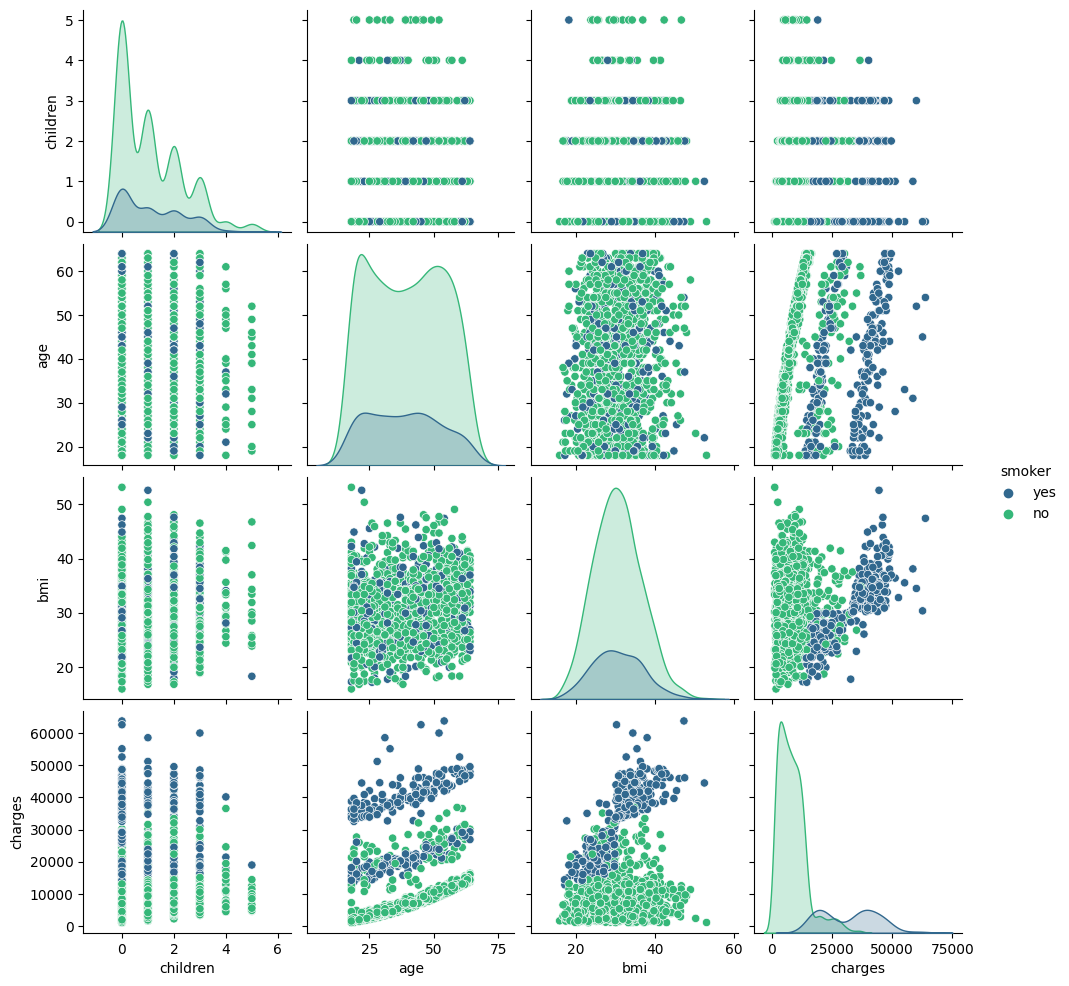

In [20]:
# Pairplot with smoker status as hue
plt.figure(figsize=(6,4))
sns.pairplot(df, vars=['children', 'age', 'bmi', 'charges'], hue='smoker', palette='viridis')
plt.show()

Insight from pairplot:

This pairplot shows the relationships between age, BMI, and charges, with color based on smoker status:
- There is a visible upward trend in charges with increasing age, more pronounced among smokers.
- The BMI vs. charges plot shows that high BMI combined with smoking may lead to high medical costs.
-  The number of children a person has does not show a strong pattern or relationship with medical charges, age, or BMI.

Overall, smokers tend to have significantly higher charges compared to non-smokers, especially at higher ages and BMIs.
This visualization helps us spot patterns and interactions between variables, especially how smoking impacts cost.

**Boxplot - to explore the dependency of charges on categorical features**

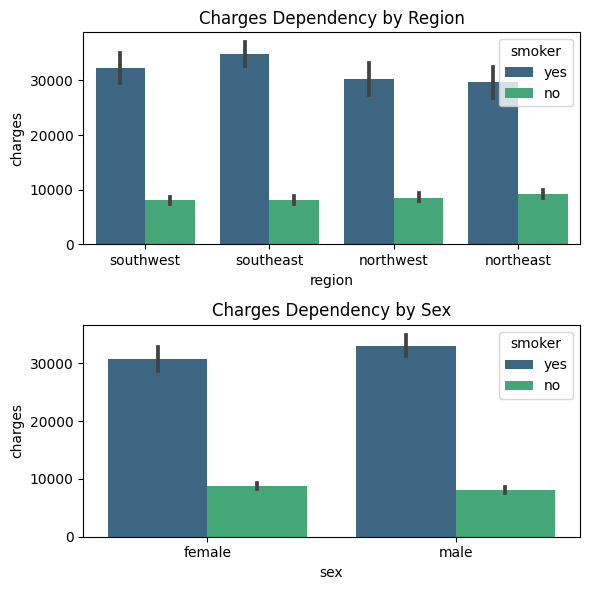

In [21]:
plt.figure(figsize=(6,6))

# Charges dependency by region
plt.subplot(2, 1, 1)
sns.barplot(data=df, x='region', y='charges', hue='smoker', palette='viridis')
plt.title('Charges Dependency by Region')

# Charges dependency by sex
plt.subplot(2,1,2)
sns.barplot(data=df, x='sex', y='charges', hue='smoker', palette='viridis')
plt.title('Charges Dependency by Sex')

plt.tight_layout()
plt.show()

Insight from charges dependency by region and sex:

- Region: Smokers consistently have higher average charges than non-smokers across all regions. The Southeast region appears to have the highest cost difference.
- Sex: Both male and female smokers have significantly higher charges than non-smokers.

The plots show that smoking has a much stronger effect on charges either by region or sex.

# 4. Are there strong correlations between personal attributes and medical costs?

In [22]:
# Compute correlation matrix
# Correlation of one variable with others for numerical column
corr = df[['age','bmi','children','charges']].corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


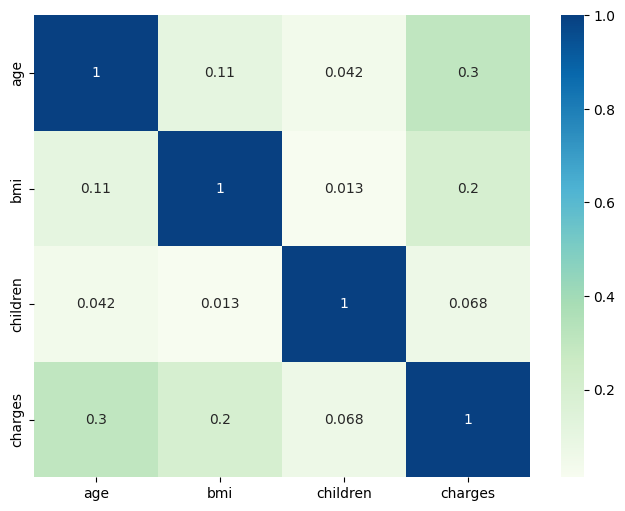

In [23]:
# Visualize the correlation with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap='GnBu')
plt.show()

Insight from heatmap:

- There are no strong correlation between variables but, charges is positively correlated with age(0.3) and bmi(0.2), meaning charges tend to increase with age and bmi.
- Children has a weakest correlation with charges (0.068), suggesting little effect.
- Age and bmi are more important factors influencing medical costs than other variables.


# Step 5: Regression Models

From the analysis above, we identify age, BMI, and especially smoking status have a strong influence on medical costs. This gives us a solid reason to build a prediction model.


We used two approaches:
- Logistic regression to classify people into high or low cost groups, useful for spotting cost risk without needing exact amounts.
- Linear regression to predict the actual medical charges based on the features.

Together, these models help us understand and estimate medical costs in different ways.

In [24]:
# Import libraries test_train_test
from sklearn.model_selection import train_test_split

# Import libraries for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import libraries for linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, probplot

# 5. Logistic regression - Can we classify individuals into high-cost or low-cost?

- To classify whether a person is likely to fall into a high or low medical cost group, we used a logistic regression model.
- This helps in identifying cost risk early, especially for smokers or individuals with high BMI or older age, enabling better healthcare planning.
- Instead of predicting an exact amount, it simplifies the problem into two categories: high_cost (1) or low_cost (0).
- To classify individuals into high-cost vs low-cost, based on the features:
   - We need to create a binary column: high_cost.
   - Let's assume high_cost threshold is at 10,000.
   - To do so we'll classify charges>threshold as high_cost (1) and the rest as low_cost (0)

In [25]:
# Create a binary target variable: 1 if charges>threshold, else 0
threshold = 10000
df['high_cost']=(df['charges']>threshold).astype(int)
df['high_cost'].value_counts()

high_cost
0    712
1    626
Name: count, dtype: int64

In [26]:
# Convert categorical variables into numerical
df_encoded = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

In [27]:
# Define features (excluding charges and high_cost columns)
x_log = df_encoded.drop(['charges','high_cost'], axis=1)

# Define target (high_cost)
y_log = df_encoded['high_cost']

In [28]:
# Train-test split
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log,y_log, test_size=0.2,random_state=42)

# Initializing model and train model
model_log = LogisticRegression(max_iter=1000)
model_log.fit(x_log_train,y_log_train)

# Predict on test data
y_log_pred = model_log.predict(x_log_test)

# Evaluation
print('Accuracy: ', accuracy_score(y_log_test,y_log_pred))
print('Confusion matrix: ')
print(confusion_matrix(y_log_test,y_log_pred))
print('classification report: ')
print(classification_report (y_log_test,y_log_pred))

Accuracy:  0.9029850746268657
Confusion matrix: 
[[138  17]
 [  9 104]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       155
           1       0.86      0.92      0.89       113

    accuracy                           0.90       268
   macro avg       0.90      0.91      0.90       268
weighted avg       0.91      0.90      0.90       268



Insight from logistic regression model:

- With a 90% overall accuracy, it demonstrates reliable predictive ability.
- High_cost prediction (1):
  - Precision (86%) means when the model predicts high cost, it's correct 86% of the time.
  - Recall (92%) indicates that it captures 92% of actual high-cost cases.
- Low_cost prediction (0):
  - Precision (94%) means when the model predicts low cost, it's correct 94% of the time.
  - Recall (89%) indicates that it captures 89% of actual low-cost cases.
- The logistic regression model shows strong performance in classifying individuals into high and low medical cost groups.
- The model’s high accuracy shows it’s reliable for predicting future data.
- If we get new records with details like age, BMI, sex, smoker status, children, and region, the model can help classify whether the person is likely to have high or low medical costs.

# 6. Linear Regression - Can we accurately predict medical charges based on demographic and lifestyle factors?

- To predict the actual medical cost (charges), we use a linear regression model.
- This model helps estimate how much an individual might need to pay based on their features like age, BMI, smoker status, etc.
- In linear regression, we assume that the residuals (the difference between the predicted values and the actual values) are normally distributed, which helps validate the model's reliability.
- Steps to do linear regression will be:
  - Fit a linear regression model.
  - Check residual normality through QQ plot and Shapiro-Wilk Test.
  - Evaluates the model.

In [29]:
# Convert categorical variables into numerical - we already did in logistic regression
#df_encoded = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

In [30]:
df_encoded

,age,bmi,children,charges,high_cost,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,False,True,False,False,True
1,18,33.770,1,1725.55230,0,True,False,False,True,False
2,28,33.000,3,4449.46200,0,True,False,False,True,False
3,33,22.705,0,21984.47061,1,True,False,True,False,False
4,32,28.880,0,3866.85520,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,True,False,True,False,False
1334,18,31.920,0,2205.98080,0,False,False,False,False,False
1335,18,36.850,0,1629.83350,0,False,False,False,True,False
1336,21,25.800,0,2007.94500,0,False,False,False,False,True


In [31]:
# Define features and target
x_lin = df_encoded.drop(['charges','high_cost'], axis=1)
y_lin = df_encoded['charges']

In [32]:
# Split the data
x_lin_train,x_lin_test,y_lin_train,y_lin_test = train_test_split(x_lin,y_lin,test_size=0.2,random_state=42)

# Initializing model and train model
model_lin = LinearRegression()
model_lin.fit(x_lin_train,y_lin_train)

# Predict on test data
y_lin_pred = model_lin.predict(x_lin_test)

In [33]:
# Calculate residuals
residuals = y_lin_test - y_lin_pred

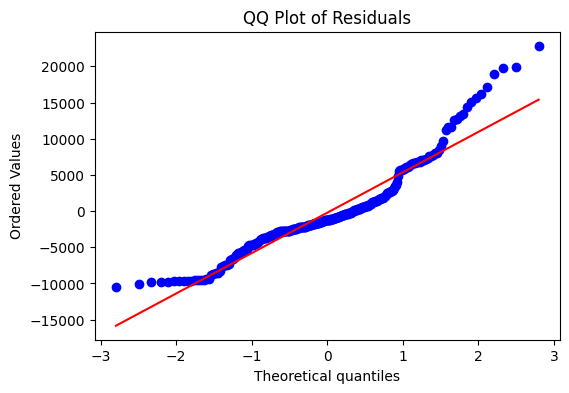

In [34]:
# Normality Test - QQ plot
plt.figure(figsize=(6,4))
probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

Insight from QQ plot:
- In the plot above, most points lie close to the red line, especially in the middle, suggesting that the residuals are approximately normally distributed.
- However, there are some deviations at the ends (tails), which may indicate slight skewness or the presence of outliers (which we already checked and decided to accept).
- Overall, the residuals appear fairly normal, which supports the reliability of the linear regression model.



In [35]:
# Normality Test - Shapiro-Wilk Test
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test Result:')
print(f'p-value: {p: .4f}')
print(f'Test statistic: {stat: .4f}')

Shapiro-Wilk Test Result:
p-value:  0.0000
Test statistic:  0.9139


Notes:
- Null hypothesis: The residuals are normally distributed.
- Alternative hypothesis: The residuals are not normally distributed.
- p-value < 0.05, reject null hypothesis.
- p-value > 0.05, failed to reject null hypothesis.

Insight from Shapiro-Wilk test result:
- p-value < 0.05, means we reject the null hypothesis, indicating that the residuals are not normally distributed.
- However, The QQ plot shows residuals are mostly normal, with slight tail deviations likely from outliers.
- The Shapiro-Wilk test detected these small deviations (from outliers), resulting in a low p-value.
- Thus, the Shapiro-Wilk test did give a low p-value but high in test statistic (0.91), meaning residuals are still close to normal.
- So, the model is likely reliable for prediction.


In [36]:
# Evaluates the model
r2score = r2_score(y_lin_test,y_lin_pred)
rmse = np.sqrt(mean_squared_error(y_lin_test,y_lin_pred))

print(f'R2 score: {r2score: .4f}' )
print(f'Root Mean Squared Error (RMSE): {rmse: .4f}' )

# Add percentage for rmse compared to overall charges
relative_rmse = (rmse / df['charges'].mean()) * 100
print(f'Relative RMSE: {relative_rmse:.2f}%')

R2 score:  0.7836
Root Mean Squared Error (RMSE):  5796.2847
Relative RMSE: 43.68%


Insight from linear regression model:

R² Score: 0.7836
- This means the model explains about 78% of the variance in medical charges.

RMSE: 5796.28
- On average, the model's predictions differ from the actual charges by about $5796, which is approximately ~40% of the average medical charges.

Note on RMSE% :
- Lower % : smaller error, means better prediction.
- Higher % : bigger error, means less accurate prediction.

Overall, these results suggest that the linear regression model provides a good level of accuracy in estimating medical costs based on the selected features.

# Conclusion - Provide actionable insights for healthcare analysts

Through this analysis, we explored key factors that influence medical insurance charges. We found that age, BMI, and especially smoking status have strong effects on costs. Charges are right-skewed, with some individuals paying very high amounts.

Using this understanding:

- We built a logistic regression model to classify individuals into high or low cost groups. This is useful for identifying cost risk without needing to know the exact charge.
- We also developed a linear regression model to estimate the actual insurance charges, which can support budgeting and healthcare planning.

Both models showed strong performance, and the results can help healthcare providers or insurers better predict and manage medical expenses, especially for high-risk individuals like smokers or those with high age or BMI.

